In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [9]:
x=df.iloc[:,[0,1,2,3,4,5,6,7]].values
x.shape

(768, 8)

In [8]:
y=df.iloc[:,-1].values
y.shape

(768,)

In [10]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape

(614, 8)

In [17]:
x_test.shape

(154, 8)

In [52]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy',max_depth=2)

clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [53]:
y_pred=clf.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7987012987012987

In [55]:
param_dist={
    'max_depth':[1,2,3,4,5,6,7,None],
    'criterion':['gini','entropy']
}

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
grid=GridSearchCV(clf,param_grid=param_dist,cv=10,n_jobs=-1)

In [58]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=2),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [59]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [60]:
grid.best_score_

np.float64(0.7343469063987308)

In [61]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [62]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

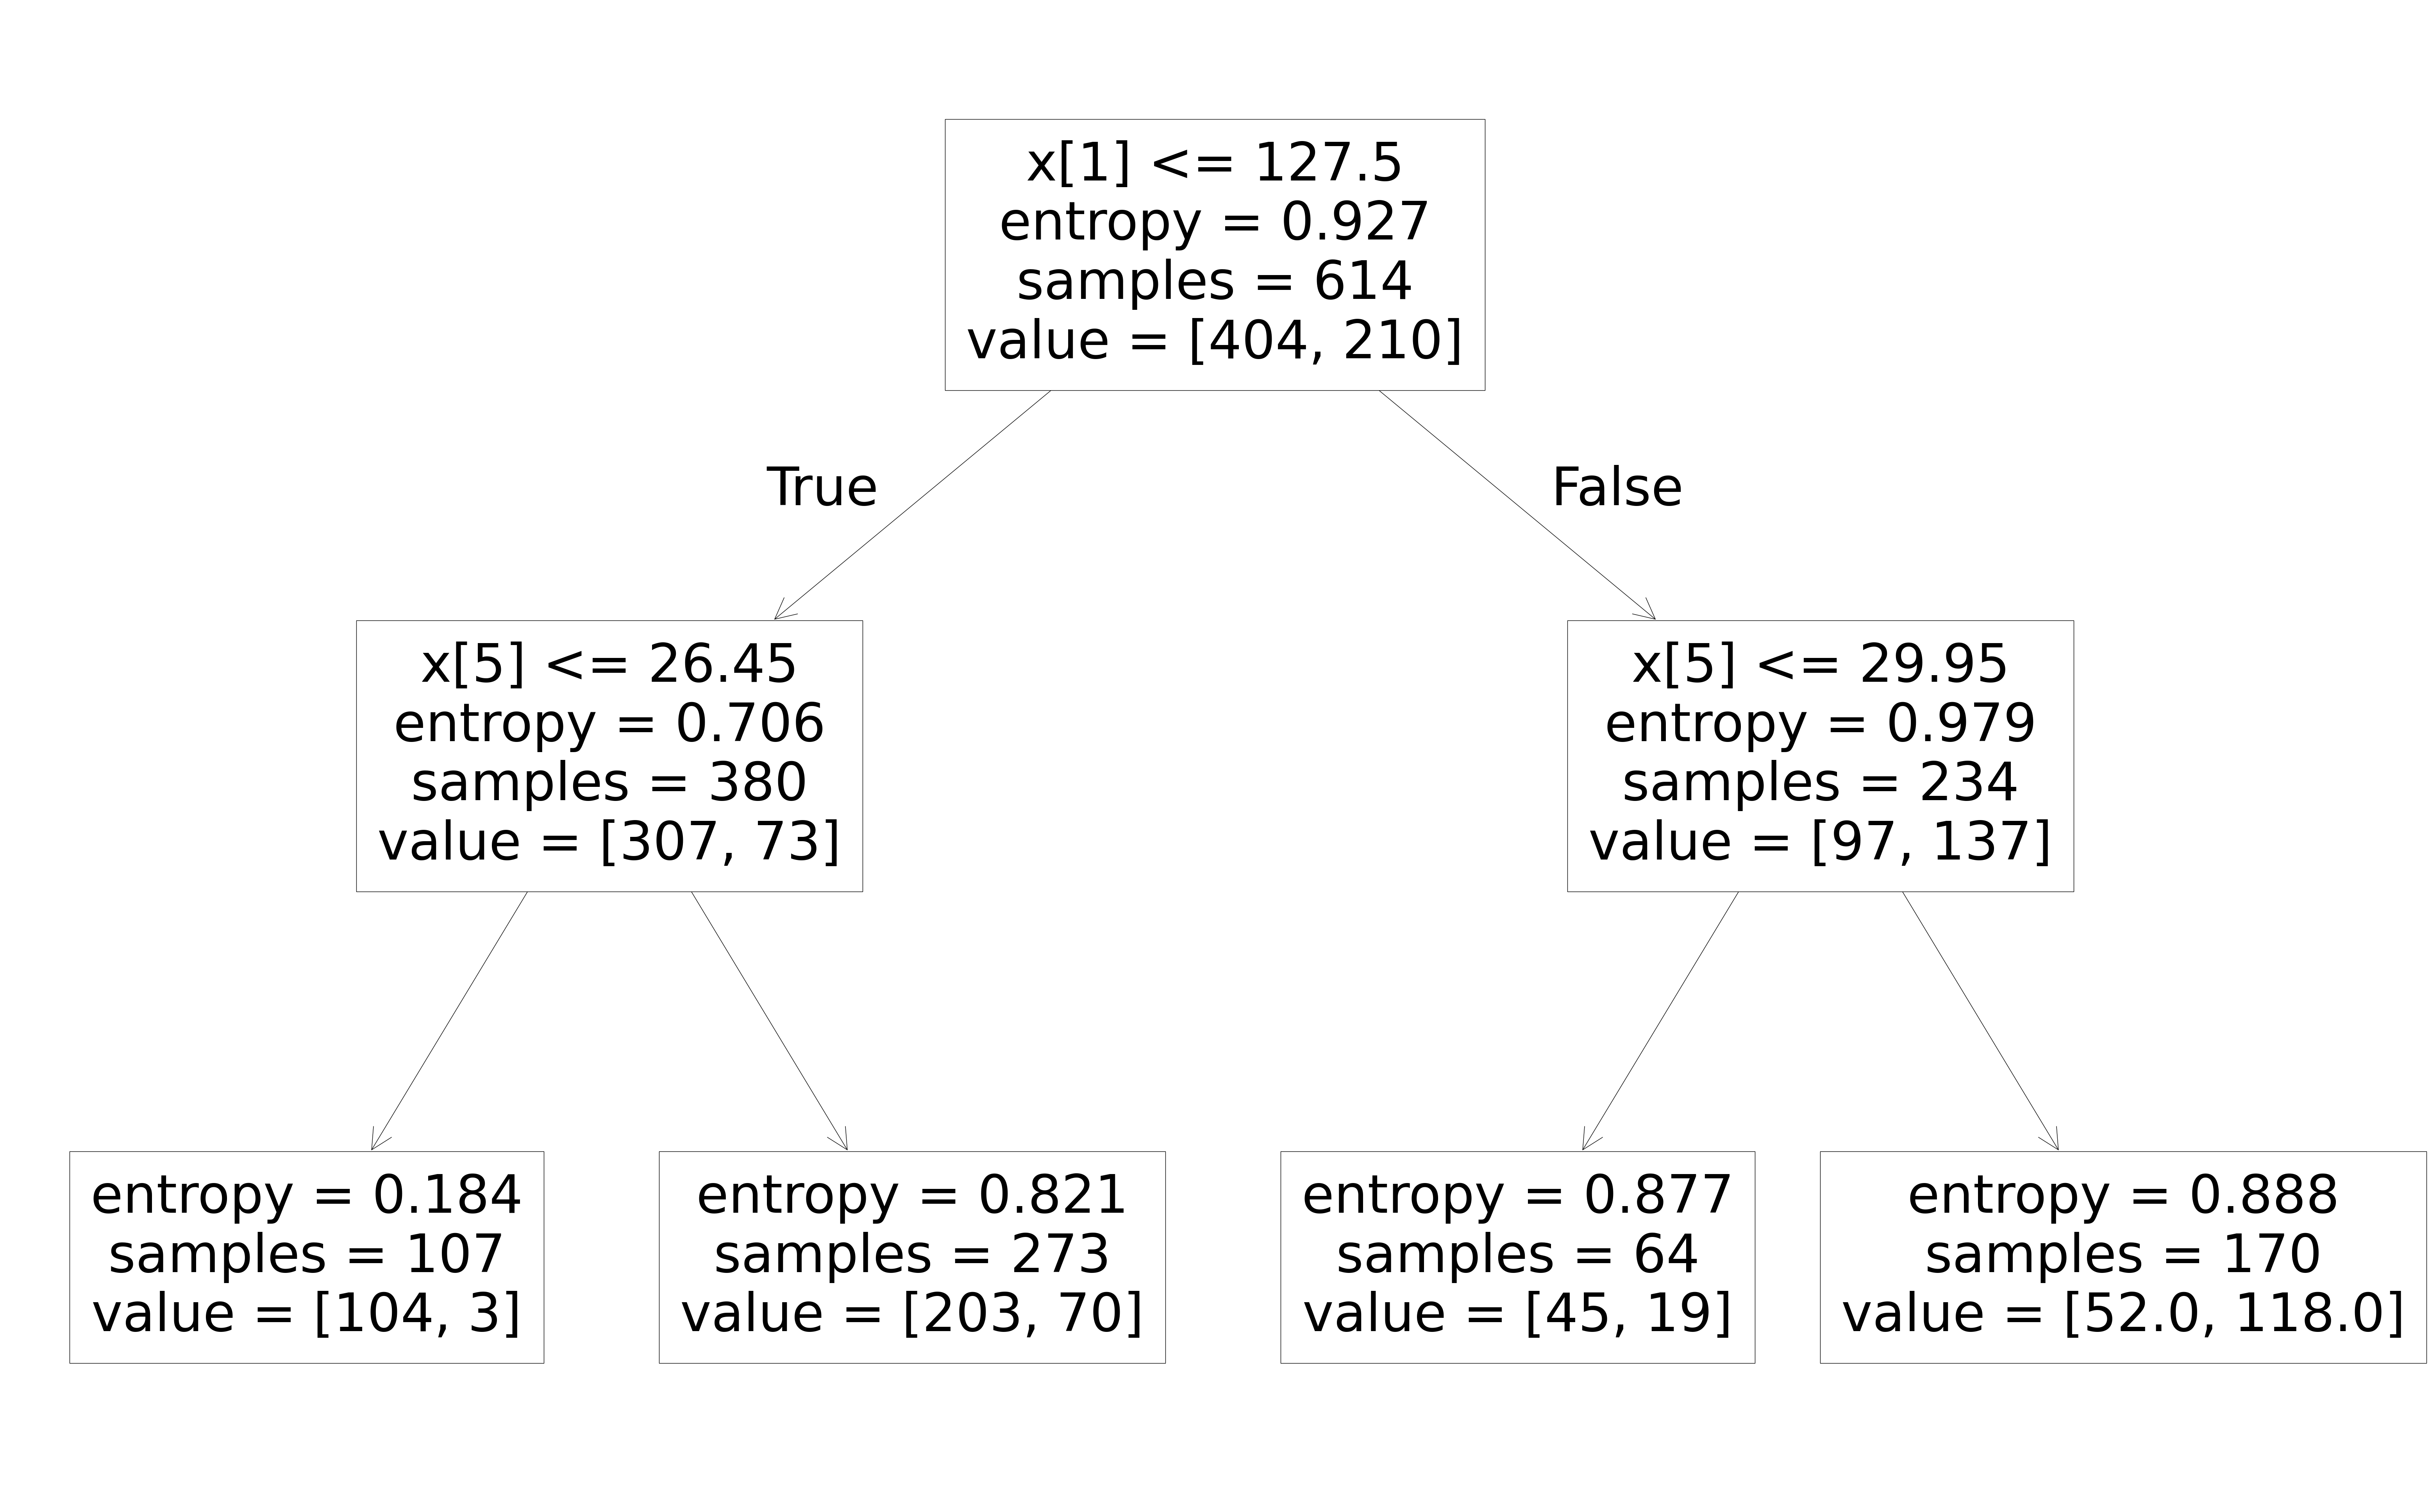

In [63]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50

plot_tree(clf)

plt.show()